`what is feature engineering`

- Feature engineering means cleaning the data into proper way so that we can develop a genralized ML models
- without proper feature engineering also we can develop models but it will be not in accuract way:
- ** very important for every data scientist **
- This notebook is used to apply the techniques which can replace null value with some required value keeping stats in mind:
    

In [114]:
# follow documentation: https://feature-engine.trainindata.com/en/latest/index.html
# scientist : https://github.com/solegalli

In [74]:
# load a dataset:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn 

In [75]:
df = pd.read_csv('./Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
df.select_dtypes(exclude='object').isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [77]:
df.shape 

(891, 12)

In [78]:
# since in the age column out of 891 rows 177 rows are empty [null values]
# how to replace the null values and using which techniques:

`Important Techniques to find the null values for numerical dataset`

- `***mean median and mode***` 
- `Arbitary values techniques`
- `End of distribution not recommended `
- `constant 0,1 techniques not recomended`
- `***Random sample imputation technique***`

### mean median mode technique 

In [79]:
# mean : replace null value with mean 
mean_value = int(df['Age'].mean())
mean_value

29

In [80]:
'Age'+'_mean_replaced'

'Age_mean_replaced'

In [89]:
def replacement(df,var,value,mean):
    df[var+mean+'_replaced'] = df[var].fillna(value)
    

In [90]:
replacement(df,'Age',mean_value,'_mean')

In [91]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean_replaced
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [92]:
df['Age_mean_replaced'].isnull().sum()

0

In [93]:
# ok we replaced 177 null values with mean value 29 so is it best replacement or not:
# we need to check the statastical graphs 


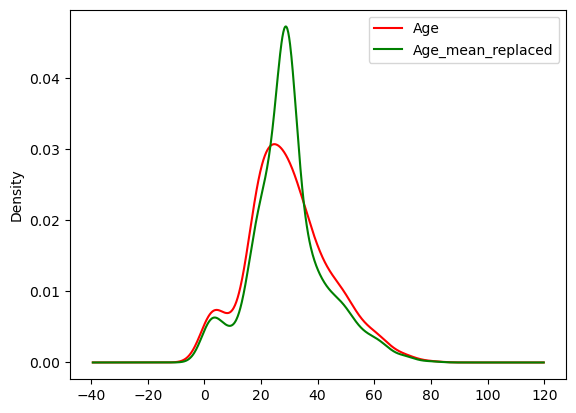

In [94]:
# check the stats graph before and after replacing null values:
# making sure that both the images fall in single outcome 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df['Age'].plot(kind='kde',ax=ax,color='r',legend='Age') # before filling null values
df['Age_mean_replaced'].plot(kind='kde',ax=ax,color='g',legend='Age_mean_replaced')# after filling null values with mean value
plt.legend(loc=0)
plt.show()

In [96]:
# now with median 
median_value = int(df['Age'].median())
median_value

28

In [97]:
# call the function from there 
replacement(df,'Age',median_value,'_median')

In [98]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean_replaced,Age_median_replaced
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


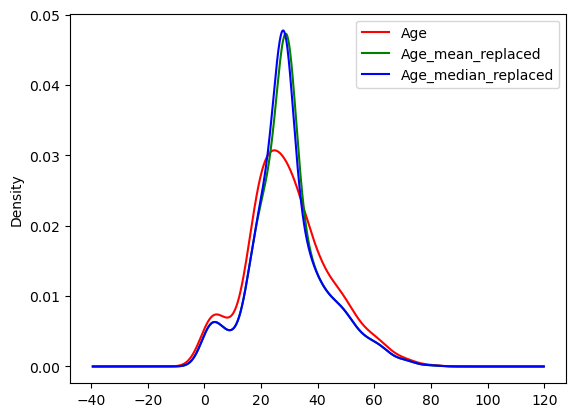

In [99]:
# check the stats graph before and after replacing null values:
# making sure that both the images fall in single outcome 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df['Age'].plot(kind='kde',ax=ax,color='r',legend='Age') # before filling null values
df['Age_mean_replaced'].plot(kind='kde',ax=ax,color='g',legend='Age_mean_replaced')# after filling null values with mean value
df['Age_median_replaced'].plot(kind='kde',ax=ax,color='b',legend='Age_median_replaced')# after filling null values with median value
plt.legend(loc=0)
plt.show()

In [103]:
# mode

mode_value = df['Age'].mode()

mode_value

0    24.0
Name: Age, dtype: float64

In [105]:
# mode

mode_value = int(df['Age'].mode()[0])

mode_value

24

In [106]:
replacement(df,'Age',mode_value,'_mode')

In [107]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean_replaced,Age_median_replaced,Age_mode_replaced
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,35.0


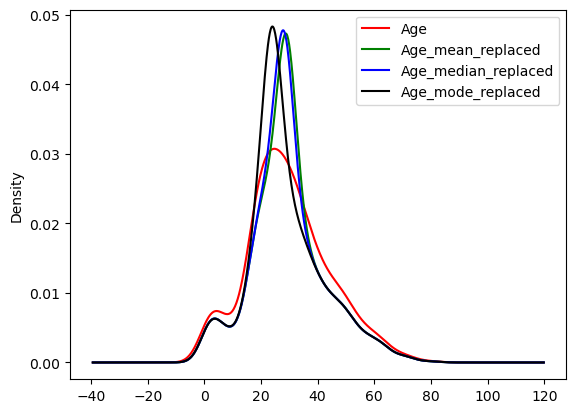

In [109]:
# check the stats graph before and after replacing null values:
# making sure that both the images fall in single outcome 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df['Age'].plot(kind='kde',ax=ax,color='r',legend='Age') # before filling null values
df['Age_mean_replaced'].plot(kind='kde',ax=ax,color='g',legend='Age_mean_replaced')# after filling null values with mean value
df['Age_median_replaced'].plot(kind='kde',ax=ax,color='b',legend='Age_median_replaced')# after filling null values with median value
df['Age_mode_replaced'].plot(kind='kde',ax=ax,color='black',legend='Age_mode_replaced')# after filling null values with mode value

plt.legend(loc=0)
plt.show()

### Arbitary value repalcement 

In [110]:
# arbitary technique means replace the value with arbitary value like -1, 99,some vaue we like 

df['Age_arbitary_1'] = df['Age'].fillna(-1)

In [111]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean_replaced,Age_median_replaced,Age_mode_replaced,Age_arbitary_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,35.0,35.0


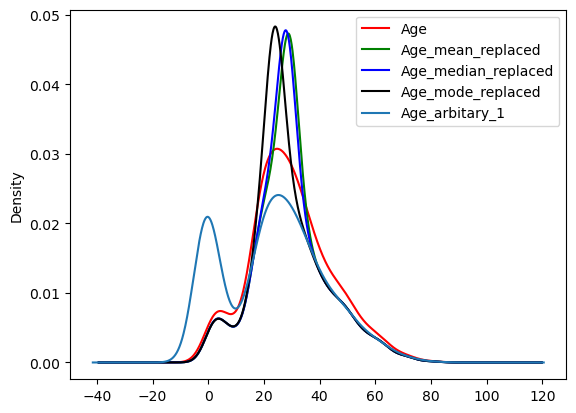

In [112]:
# check the stats graph before and after replacing null values:
# making sure that both the images fall in single outcome 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df['Age'].plot(kind='kde',ax=ax,color='r',legend='Age') # before filling null values
df['Age_mean_replaced'].plot(kind='kde',ax=ax,color='g',legend='Age_mean_replaced')# after filling null values with mean value
df['Age_median_replaced'].plot(kind='kde',ax=ax,color='b',legend='Age_median_replaced')# after filling null values with median value
df['Age_mode_replaced'].plot(kind='kde',ax=ax,color='black',legend='Age_mode_replaced')# after filling null values with mode value
df['Age_arbitary_1'].plot(kind='kde',ax=ax,legend='Age_Arbitary_1')# after filling null values with arbitary-1 value

plt.legend(loc=0)
plt.show()

## Random sample Imputation *************

In [113]:
# randommly select the values and replace in the place of null value

In [119]:
s = df['Age'].dropna().sample(3)
s

467    56.0
659    58.0
138    16.0
Name: Age, dtype: float64

In [120]:
df['Age'].isnull().sum()

177

In [126]:
s = df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=11)
s # sample 177 outcomes 

585    18.0
341    24.0
636    32.0
716    38.0
817    31.0
       ... 
488    30.0
376    22.0
830    15.0
710    24.0
827     1.0
Name: Age, Length: 177, dtype: float64

In [127]:
s.index  # index of the values 

Int64Index([585, 341, 636, 716, 817, 237, 407, 371, 512, 370,
            ...
            869, 318, 171, 137, 372, 488, 376, 830, 710, 827],
           dtype='int64', length=177)

In [131]:
df['Age'][17]

nan

In [129]:
df['Age'].isnull()  # where ever there is nullvalue we aregoing to get TRue

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [130]:
df[df['Age'].isnull()].index  # gives the index of null values points


Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [134]:
x = df[df['Age'].isnull()].head(3)
x

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean_replaced,Age_median_replaced,Age_mode_replaced,Age_arbitary_1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,29.0,28.0,24.0,-1.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,29.0,28.0,24.0,-1.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,29.0,28.0,24.0,-1.0


In [135]:
# step_1:

df["Age_random_replaced"]=df['Age'].copy()

In [136]:
# step 2 select random values 
s = df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=11)
s # sample 177 outcomes 

585    18.0
341    24.0
636    32.0
716    38.0
817    31.0
       ... 
488    30.0
376    22.0
830    15.0
710    24.0
827     1.0
Name: Age, Length: 177, dtype: float64

In [139]:
# step 3: assign index to null positions 
s.index = df[df['Age'].isnull()].index  # as inex will be replaced with null vaue index 

In [140]:
# step 4:
df.loc[df['Age'].isnull(),'Age_random_replaced'] = s

In [141]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean_replaced,Age_median_replaced,Age_mode_replaced,Age_arbitary_1,Age_random_replaced
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,35.0,35.0,35.0


In [142]:
df['Age_random_replaced'].isnull().sum()

0

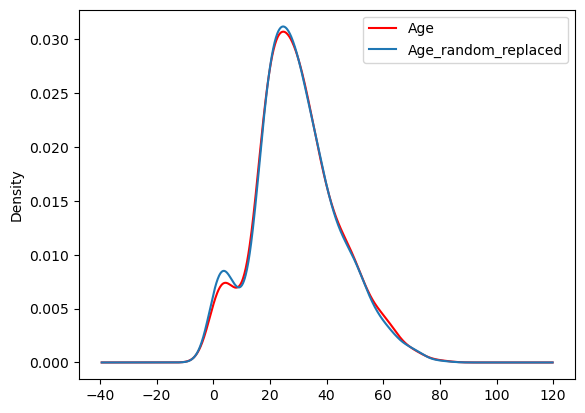

In [144]:
# check the stats graph before and after replacing null values:
# making sure that both the images fall in single outcome 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df['Age'].plot(kind='kde',ax=ax,color='r',legend='Age') # before filling null values
#df['Age_mean_replaced'].plot(kind='kde',ax=ax,color='g',legend='Age_mean_replaced')# after filling null values with mean value
#df['Age_median_replaced'].plot(kind='kde',ax=ax,color='b',legend='Age_median_replaced')# after filling null values with median value
#df['Age_mode_replaced'].plot(kind='kde',ax=ax,color='black',legend='Age_mode_replaced')# after filling null values with mode value
#df['Age_arbitary_1'].plot(kind='kde',ax=ax,legend='Age_Arbitary_1')# after filling null values with arbitary-1 value
df['Age_random_replaced'].plot(kind='kde',ax=ax,legend='Age_random_replaced')# after filling null values with Age_random_replaced value

plt.legend(loc=0)
plt.show()

In [160]:
# know find the std for all the techniques along with original column 


print('original age column std = ',df['Age'].std())
print('mean std = ',df['Age_mean_replaced'].std())
print('median std = ',df['Age_median_replaced'].std())
print('mode std = ',df['Age_mode_replaced'].std())
print('random sample std = ',df['Age_random_replaced'].std())

original age column std =  14.526497332334044
mean std =  13.005010341761817
median std =  13.019696550973194
mode std =  13.199571767746487
random sample std =  14.564519233800135


In [162]:
# categorical data : Null values:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean_replaced,Age_median_replaced,Age_mode_replaced,Age_arbitary_1,Age_random_replaced
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,35.0,35.0,35.0


In [163]:
df.isnull().sum()

PassengerId              0
Survived                 0
Pclass                   0
Name                     0
Sex                      0
Age                    177
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                  687
Embarked                 2
Age_mean_replaced        0
Age_median_replaced      0
Age_mode_replaced        0
Age_arbitary_1           0
Age_random_replaced      0
dtype: int64

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    int64  
 3   Name                 891 non-null    object 
 4   Sex                  891 non-null    object 
 5   Age                  714 non-null    float64
 6   SibSp                891 non-null    int64  
 7   Parch                891 non-null    int64  
 8   Ticket               891 non-null    object 
 9   Fare                 891 non-null    float64
 10  Cabin                204 non-null    object 
 11  Embarked             889 non-null    object 
 12  Age_mean_replaced    891 non-null    float64
 13  Age_median_replaced  891 non-null    float64
 14  Age_mode_replaced    891 non-null    float64
 15  Age_arbitary_1       891 non-null    flo

In [165]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [166]:
# to solve the null values in categorical data we need to use mode technique only 


In [169]:
df['Cabin_first_chr'] = df['Cabin'].str[0]


In [170]:
df['Cabin_first_chr'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [171]:
df['Cabin_first_chr'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_first_chr, dtype: int64

<AxesSubplot:>

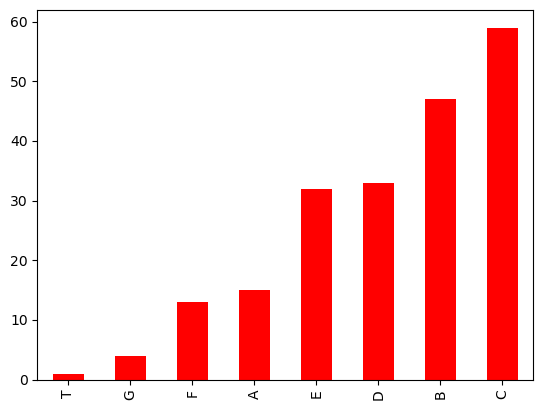

In [177]:
df['Cabin_first_chr'].value_counts().sort_values(ascending=True).plot.bar(color='r')

In [178]:
df['Cabin_replaced'] = df['Cabin'].fillna('C')

In [179]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean_replaced,Age_median_replaced,Age_mode_replaced,Age_arbitary_1,Age_random_replaced,Cabin_first_chr,Cabin_replaced
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,22.0,22.0,22.0,NaN,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,38.0,38.0,38.0,C,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,26.0,26.0,26.0,NaN,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,35.0,35.0,35.0,C,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,35.0,35.0,35.0,NaN,C


In [181]:
df['Cabin_replaced'].isnull().sum()

0

In [182]:
# but converting categorical data to numerical is really challenging :